# Machine Learning Methods - The Final Project
The final project consists of two problems, classification, and regression. Your task is to create a full solution on your own. This includes:
- preparing and cleaning the data
- selecting the right metric for the task
- find the model that gives the best results

Be verbose, explain each decision you are making. The solution must be completely reproducible, from loading the data, to obtaining the full result. Make sure you save a notebook that includes all the outputs.

While your task is not to win a competition, your models should have good performance. A model that achieves 50 on some metric, where you could have got 60 on the same metric with some tuning (some, not extreme) will result in reduced points.

Send your solution to `vedran.vekic@racunarstvo.hr`. The deadline is a `24.02.2020.` at `8AM`. 

## Honor code

All the work that you do must be your own. All parties involved will get 0 credit and will be reported for cheating. But that is not the worst thing, the worst thing is that you will miss the opportunity to learn.

**Please take this VERY seriously!**

## Q1. Health App (i1: 8, i2: 2.5, i3: 1, i4: 15)
You are given user engagement data from a health app. Each user selects to pay from 1USD to 20USD for the trial period. After a trial period is over, a user decides will he/she pay the full price. Your task is to predict, given user and user engagement data, will a user subscribe or not and assess how good your model is.

The data is provided in `final_project_data_q1.csv` file. Description of each feature follows:
- `user_id`: unique user identifier.
- `age`: user age.
- `gender`: user gender.
- `trial_price_paid_usd`: price user selected to pay for a trial period.
- `acquisition_channel`: from which advertising channel did the user come from. The format of the data `SOURCE_COOKIE`.
- `exercises/meals/content logged`: count of different app engagement.
- `timespent_ms`: the total amount of time the user was using the app in milliseconds.
- `subscribed`: did user subscribe for a full price, after the trial period. The target variable we are trying to predict.
- `Q1-Q10`: before registering for a trial, users had to answer 10 different questions. Each question has some fixed number of answers. Question columns represent the ids for each answer.

Your task is to:
1. train and evaluate the following models:
    - support vector machines
    - lightgbm
1. find the top 5 most important features in predicting subscription

**Important note**: performance matters, try to obtain a good result.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


In [106]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("final_project_data_q1.csv")
print(df.shape)
df.head()

(20000, 20)


,user_id,age,gender,trial_price_paid_usd,acquisition_channel,exercises_logged,meals_logged,content_logged,timespent_ms,subscribed,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,0,44,f,10,FACEBOOK_d41d8cd98f00b204e9800998ecf8427e,0,0,0,0.000000e+00,1,1,2,0,2,1,1,0,1,4,0
1,1,68,f,14,FACEBOOK_93b885adfe0da089cdf634904fd59f71,1,8,14,1.428894e+07,0,1,1,0,1,1,0,0,0,1,4
2,2,25,m,7,YOUTUBE_c4103f122d27677c9db144cae1394a66,5,10,13,2.211746e+07,1,0,0,0,2,0,0,0,0,0,2
3,3,28,f,12,EMAIL_693e9af84d3dfcc71e640e005bdc5e2e,5,7,16,2.756214e+07,0,1,1,0,1,1,0,0,0,4,2
4,4,35,m,11,GOOGLE_f1d3ff8443297732862df21dc4e57262,5,9,17,2.843598e+07,1,2,0,0,3,1,2,1,0,1,1


In [229]:
df.acquisition_channel.values

array(['FACEBOOK_d41d8cd98f00b204e9800998ecf8427e',
       'FACEBOOK_93b885adfe0da089cdf634904fd59f71',
       'YOUTUBE_c4103f122d27677c9db144cae1394a66', ...,
       'OTHER_WEB_56583d5feb071c517c417b277bd59f5e',
       'FACEBOOK_76ddd0f52b1ed08bf34ccc5a4bc09469',
       'YOUTUBE_59339787683bb943f69247f88714b4a4'], dtype=object)

In [228]:
df.acquisition_channel.value_counts()

EMAIL_661fd53fb38677a00f88cf6164d577dd        1
EMAIL_1ed251c2edd6edaf8bd3ca5445ebc651        1
FACEBOOK_30a3aff58bb9184853bb6811168e4612     1
EMAIL_bdd6d7a03f459d031f28bb5897fe8b44        1
FACEBOOK_ff9097bb33dee602d7134730e93512e3     1
FACEBOOK_79db58d81b6bffe403a5adafa9c5a3fa     1
GOOGLE_9ef77571441264e0e3a433986bf6f904       1
OTHER_WEB_de89793ee25a74e6016afea665601d09    1
YOUTUBE_f9de5ac669f5d563a9f5f378c0fcd38e      1
OTHER_WEB_d8835d2bae7a0e71cea77cf214a358ae    1
FACEBOOK_4aed5744386f9504229914339dd491c8     1
EMAIL_496b8679c495e797d71ab7f273483c9e        1
EMAIL_6c760d3d7f43fe417896305a7a897c4b        1
TV_1994dbd2af81d98b5b3ae10e431b139d           1
GOOGLE_a6c3120548e7812116d52de439fe1fe8       1
FACEBOOK_657370d77ffcf2bbd37238df9b7551a9     1
FACEBOOK_2128450b0cb042bfb4a879bc8aa9d23f     1
EMAIL_766f2001ae0e9ee66724b2d6f45586e6        1
GOOGLE_59c50ddbfd35af904e0a85e594a679e9       1
OTHER_WEB_58fb4f45460ce8584d16c09125af1bcd    1
FACEBOOK_71b445d43959effc03861d1a8da3d7a

In [4]:
import numpy as np
import re
clean_txt=[]
for txt in df.acquisition_channel.values:
    txt=re.sub('[0-9]+', '', txt)
    txt=re.sub('[a-z]+', '', txt)
    txt=re.sub('_', '', txt)
    clean_txt.append(txt)
np.array(clean_txt)

array(['FACEBOOK', 'FACEBOOK', 'YOUTUBE', ..., 'OTHERWEB', 'FACEBOOK',
       'YOUTUBE'], dtype='<U8')

In [5]:
df.acquisition_channel=np.array(clean_txt)

In [234]:
df.head()

,user_id,age,gender,trial_price_paid_usd,acquisition_channel,exercises_logged,meals_logged,content_logged,timespent_ms,subscribed,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,0,44,f,10,FACEBOOK,0,0,0,0.000000e+00,1,1,2,0,2,1,1,0,1,4,0
1,1,68,f,14,FACEBOOK,1,8,14,1.428894e+07,0,1,1,0,1,1,0,0,0,1,4
2,2,25,m,7,YOUTUBE,5,10,13,2.211746e+07,1,0,0,0,2,0,0,0,0,0,2
3,3,28,f,12,EMAIL,5,7,16,2.756214e+07,0,1,1,0,1,1,0,0,0,4,2
4,4,35,m,11,GOOGLE,5,9,17,2.843598e+07,1,2,0,0,3,1,2,1,0,1,1


In [235]:
df.acquisition_channel.value_counts()

GOOGLE      5444
FACEBOOK    5443
YOUTUBE     3578
OTHERWEB    1792
EMAIL       1773
TV          1582
RADIO        388
Name: acquisition_channel, dtype: int64

In [6]:
cat=pd.get_dummies(df.acquisition_channel)
cat.head()

,EMAIL,FACEBOOK,GOOGLE,OTHERWEB,RADIO,TV,YOUTUBE
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0


In [7]:
df=df.merge(cat, left_index=True, right_index=True)
df.head()

,user_id,age,gender,trial_price_paid_usd,acquisition_channel,exercises_logged,meals_logged,content_logged,timespent_ms,subscribed,...,Q8,Q9,Q10,EMAIL,FACEBOOK,GOOGLE,OTHERWEB,RADIO,TV,YOUTUBE
0,0,44,f,10,FACEBOOK,0,0,0,0.000000e+00,1,...,1,4,0,0,1,0,0,0,0,0
1,1,68,f,14,FACEBOOK,1,8,14,1.428894e+07,0,...,0,1,4,0,1,0,0,0,0,0
2,2,25,m,7,YOUTUBE,5,10,13,2.211746e+07,1,...,0,0,2,0,0,0,0,0,0,1
3,3,28,f,12,EMAIL,5,7,16,2.756214e+07,0,...,0,4,2,1,0,0,0,0,0,0
4,4,35,m,11,GOOGLE,5,9,17,2.843598e+07,1,...,0,1,1,0,0,1,0,0,0,0


In [8]:
cat=pd.get_dummies(df.gender)
cat.head()

,f,m
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1


In [9]:
df=df.merge(cat, left_index=True, right_index=True)
df.head()

,user_id,age,gender,trial_price_paid_usd,acquisition_channel,exercises_logged,meals_logged,content_logged,timespent_ms,subscribed,...,Q10,EMAIL,FACEBOOK,GOOGLE,OTHERWEB,RADIO,TV,YOUTUBE,f,m
0,0,44,f,10,FACEBOOK,0,0,0,0.000000e+00,1,...,0,0,1,0,0,0,0,0,1,0
1,1,68,f,14,FACEBOOK,1,8,14,1.428894e+07,0,...,4,0,1,0,0,0,0,0,1,0
2,2,25,m,7,YOUTUBE,5,10,13,2.211746e+07,1,...,2,0,0,0,0,0,0,1,0,1
3,3,28,f,12,EMAIL,5,7,16,2.756214e+07,0,...,2,1,0,0,0,0,0,0,1,0
4,4,35,m,11,GOOGLE,5,9,17,2.843598e+07,1,...,1,0,0,1,0,0,0,0,0,1


In [10]:
df=df.drop(["gender", 'acquisition_channel'], axis=1)

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.dtypes.value_counts()

int64      17
uint8       9
float64     1
dtype: int64

In [246]:
df.corr()

,user_id,age,trial_price_paid_usd,exercises_logged,meals_logged,content_logged,timespent_ms,subscribed,Q1,Q2,...,Q10,EMAIL,FACEBOOK,GOOGLE,OTHERWEB,RADIO,TV,YOUTUBE,f,m
user_id,1.000000,0.005746,0.005860,0.007082,0.004662,0.000182,-0.004011,0.003259,-0.001856,-0.013495,...,0.000576,0.006697,0.001420,-0.016116,0.003842,-0.000814,-0.003429,0.011944,-0.009119,0.009119
age,0.005746,1.000000,0.008805,-0.008466,-0.014690,-0.015645,-0.017057,-0.021682,-0.012428,-0.002114,...,0.006212,0.005773,-0.003734,-0.005421,0.004768,-0.006371,-0.005888,0.009236,0.000758,-0.000758
trial_price_paid_usd,0.005860,0.008805,1.000000,-0.021543,-0.018728,-0.014613,-0.011452,0.039628,-0.013390,-0.000004,...,-0.003440,0.009887,-0.007693,-0.010409,0.003722,0.020798,0.004442,0.000303,0.003697,-0.003697
exercises_logged,0.007082,-0.008466,-0.021543,1.000000,0.571206,0.593958,0.506590,0.311956,0.001899,0.006253,...,0.010218,-0.021725,0.102710,-0.108146,-0.062783,0.017593,0.074570,0.010374,0.002614,-0.002614
meals_logged,0.004662,-0.014690,-0.018728,0.571206,1.000000,0.716529,0.604759,0.295469,-0.003107,0.007379,...,0.001476,-0.021288,0.118537,-0.123761,-0.083082,0.012075,0.089846,0.016160,0.005244,-0.005244
content_logged,0.000182,-0.015645,-0.014613,0.593958,0.716529,1.000000,0.632951,0.267215,0.003284,0.010517,...,0.002628,-0.022600,0.119914,-0.129197,-0.071071,0.016411,0.085911,0.014107,-0.004955,0.004955
timespent_ms,-0.004011,-0.017057,-0.011452,0.506590,0.604759,0.632951,1.000000,0.232518,0.011362,0.007022,...,0.008175,-0.022354,0.087522,-0.087279,-0.051645,0.016193,0.061296,0.005796,0.002040,-0.002040
subscribed,0.003259,-0.021682,0.039628,0.311956,0.295469,0.267215,0.232518,1.000000,0.006423,0.008059,...,0.015893,-0.015470,0.039778,-0.027786,-0.036328,0.007176,0.037384,-0.004288,-0.017998,0.017998
Q1,-0.001856,-0.012428,-0.013390,0.001899,-0.003107,0.003284,0.011362,0.006423,1.000000,-0.017207,...,0.015355,-0.000979,-0.003884,0.001899,0.005675,-0.003080,0.005348,-0.003855,-0.000996,0.000996
Q2,-0.013495,-0.002114,-0.000004,0.006253,0.007379,0.010517,0.007022,0.008059,-0.017207,1.000000,...,-0.002824,0.004493,0.003466,-0.012250,0.006538,0.002290,0.009680,-0.005643,0.007818,-0.007818


In [247]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(10, 'subscribed').index
columns

Index(['subscribed', 'exercises_logged', 'meals_logged', 'content_logged',
       'timespent_ms', 'FACEBOOK', 'trial_price_paid_usd', 'TV', 'Q9', 'm'],
      dtype='object')

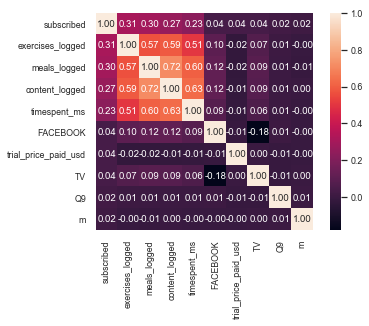

In [251]:
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=0.8)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [13]:
X=df.drop(['subscribed'], axis=1)
y=df.subscribed.values

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [24]:
pca = PCA(.95)
pca.fit(X_train_scaled)
print(pca.n_components_)

21


In [27]:
import seaborn as sns
sns.set()

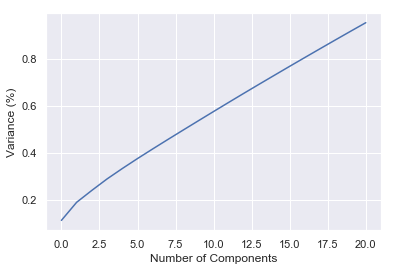

In [28]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.show()

In [29]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.11187948 0.07701607 0.05086022 0.04881546 0.04428169 0.04254409
 0.04111396 0.04044147 0.03992023 0.03968648 0.03946818 0.03917405
 0.03888321 0.03849718 0.03812373 0.03802409 0.03765002 0.03746233
 0.03725963 0.03696074 0.03659108]


In [30]:
train_pca = pca.transform(X_train_scaled)
test_pca = pca.transform(X_test_scaled)

In [260]:
df.shape

(20000, 27)

In [261]:
df.head()

,user_id,age,trial_price_paid_usd,exercises_logged,meals_logged,content_logged,timespent_ms,subscribed,Q1,Q2,...,Q10,EMAIL,FACEBOOK,GOOGLE,OTHERWEB,RADIO,TV,YOUTUBE,f,m
0,0,44,10,0,0,0,0.000000e+00,1,1,2,...,0,0,1,0,0,0,0,0,1,0
1,1,68,14,1,8,14,1.428894e+07,0,1,1,...,4,0,1,0,0,0,0,0,1,0
2,2,25,7,5,10,13,2.211746e+07,1,0,0,...,2,0,0,0,0,0,0,1,0,1
3,3,28,12,5,7,16,2.756214e+07,0,1,1,...,2,1,0,0,0,0,0,0,1,0
4,4,35,11,5,9,17,2.843598e+07,1,2,0,...,1,0,0,1,0,0,0,0,0,1


### Test SVM classifier 

In [ ]:
#SWM withlinear kernel takes too long time on my machine
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

In [1]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
   
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
  
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [ ]:
y_pred=model.predict(X_test)


In [ ]:
accuracy_score(y_test, y_pred)

In [32]:
ss = StandardScaler()
pca = PCA(n_components=20, random_state=42, svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(ss, pca, svc)

In [33]:
from sklearn.metrics import f1_score, make_scorer
from functools import partial

f1_score_partial = partial(f1_score, average='macro')

scorer = make_scorer(f1_score_partial)

In [34]:

param_grid = {'svc__C': [10, 25, 35],
              'svc__gamma': [0.0005, 0.0001, 0.00005],
              'svc__decision_function_shape': ["ovo", "ovr"]}
grid = GridSearchCV(model, param_grid, n_jobs=-1, scoring=scorer)

%time grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Wall time: 5min 29s
{'svc__C': 25, 'svc__decision_function_shape': 'ovo', 'svc__gamma': 5e-05}
0.5754456472145646


In [35]:
model = grid.best_estimator_
y_fit = model.predict(X_test)

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_fit)

0.592

### Test lightgbm Classifier

In [37]:
import lightgbm as lgb

In [58]:
ss = StandardScaler()
pca = PCA(n_components=20, random_state=42, svd_solver='randomized')
reg = lgb.LGBMClassifier( num_estimators= 100, objective ='binary', random_state=42)
model = make_pipeline(ss, pca, reg)

In [59]:


param_grid = {'lgbmclassifier__num_leaves': [10, 20, 30, 40],
              'lgbmclassifier__min_split_gain': [0, 1, 2],
              }
grid = GridSearchCV(model, param_grid, n_jobs=-1, scoring=scorer)

%time grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Wall time: 11.1 s
{'lgbmclassifier__min_split_gain': 2, 'lgbmclassifier__num_leaves': 10}
0.6195267611910897


In [ ]:

param_grid = {'lgbmclassifier__num_leaves': [2, 5, 10, 20, 30, 40],
              'lgbmclassifier__min_split_gain': [0, 1, 2, 3],
              }
grid = GridSearchCV(model, param_grid, n_jobs=-1, scoring=scorer)

%time grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

In [62]:

param_grid = {'lgbmclassifier__num_leaves': [ 5, 10, 40, 80],
              'lgbmclassifier__min_split_gain': [ 2, 3, 5, 10],
              }
grid = GridSearchCV(model, param_grid, n_jobs=-1, scoring=scorer)

%time grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Wall time: 5.32 s
{'lgbmclassifier__min_split_gain': 3, 'lgbmclassifier__num_leaves': 10}
0.6211175332593403


In [69]:
ss = StandardScaler()
pca = PCA(n_components=20, random_state=42, svd_solver='randomized')
reg = lgb.LGBMClassifier( num_estimators= 100, min_split_gain=3, objective ='binary', random_state=42)
model = make_pipeline(ss, pca, reg)

In [70]:

param_grid = {'lgbmclassifier__num_leaves': [ 5, 10, 40, 80],
              'lgbmclassifier__min_child_samples': [10, 20, 30,60 ]
              }
grid = GridSearchCV(model, param_grid, n_jobs=-1, scoring=scorer)

%time grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Wall time: 9.68 s
{'lgbmclassifier__min_child_samples': 60, 'lgbmclassifier__num_leaves': 5}
0.6215916892275392


In [71]:

param_grid = {'lgbmclassifier__num_leaves': [2,3, 5, 10, 40],
              'lgbmclassifier__min_child_samples': [10, 20, 30,60, 200 ]
              }
grid = GridSearchCV(model, param_grid, n_jobs=-1, scoring=scorer)

%time grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Wall time: 7.57 s
{'lgbmclassifier__min_child_samples': 10, 'lgbmclassifier__num_leaves': 3}
0.6220129222338768


#### try with anotherr scaler

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0, 1])
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


model= lgb.LGBMClassifier( num_estimators= 100, min_child_samples=200, objective ='binary', random_state=42)

param_grid = {'lgbmclassifier__num_leaves': [2,5, 7, 10, 20, 30, 40],
              'lgbmclassifier__min_split_gain': [0, 1, 3, 5, 30, 50]
              }
grid = GridSearchCV(model, param_grid, n_jobs=-1, scoring=scorer)

%time grid.fit(X_train_sc, y_train)
print(grid.best_params_)
print(grid.best_score_)

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 15.3 s
{'lgbmclassifier__min_split_gain': 0, 'lgbmclassifier__num_leaves': 2}
0.613861504181207


In [56]:
reg.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'num_estimators'])

#### Try another way to reduce dimensionality by using metrics information value and weight of evidence

In [82]:
import traceback
import string
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re

In [80]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [83]:
final_iv, IV = data_vars(X,y)

In [84]:
final_iv.head()

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,user_id,0.0,9999.0,10000,4387,0.438700,5613,0.561300,0.500114,0.499911,0.000406,1.649369e-07
1,user_id,10000.0,19999.0,10000,4385,0.438500,5615,0.561500,0.499886,0.500089,-0.000406,1.649369e-07
2,age,18.0,48.0,10095,4504,0.446161,5591,0.553839,0.513452,0.497952,0.030654,9.612445e-04
3,age,49.0,95.0,9905,4268,0.430893,5637,0.569107,0.486548,0.502048,-0.031361,9.612445e-04
4,trial_price_paid_usd,1.0,5.0,5393,2209,0.409605,3184,0.590395,0.251824,0.283577,-0.118753,6.219487e-03


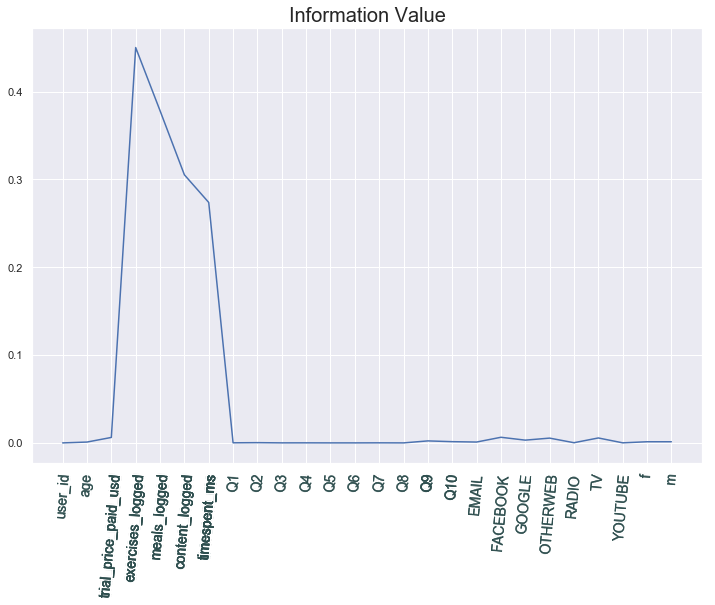

In [85]:
plt.figure(figsize=(12,8))
plt.plot(final_iv['VAR_NAME'], final_iv['IV'])
plt.title('Information Value', fontsize=20)
plt.xticks(final_iv['VAR_NAME'], rotation=85, fontsize=14, color='darkslategray' )
plt.show()

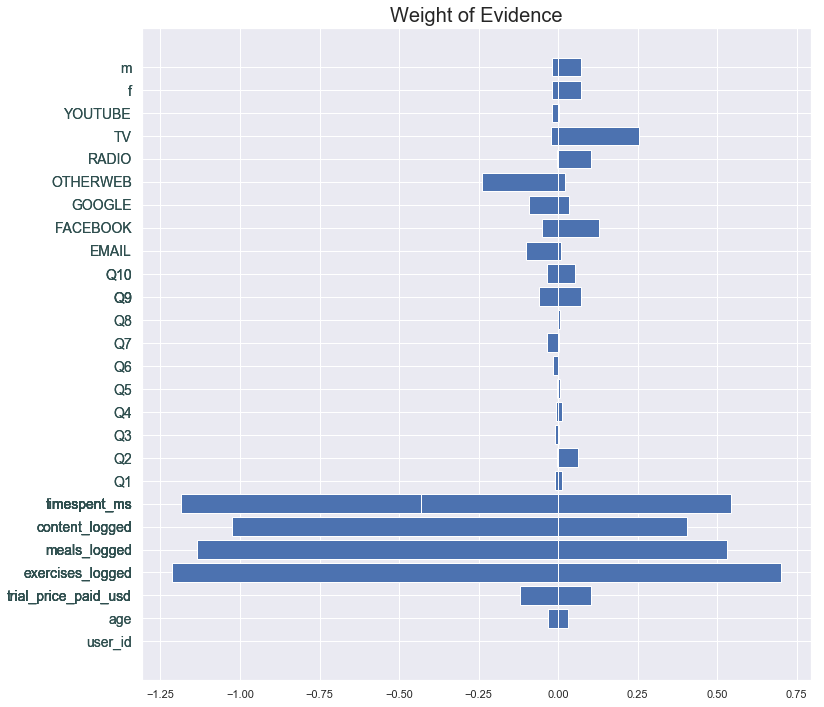

In [86]:
plt.figure(figsize=(12,12))
plt.barh(final_iv['VAR_NAME'],
            final_iv['WOE'])
plt.title('Weight of Evidence', fontsize=20)
plt.yticks(final_iv['VAR_NAME'], rotation=0, fontsize=14, color='darkslategray' )
plt.show()
# if woe is zero - skip it


In [87]:
final_iv.query('0.3<= IV <= 0.5') #best predictords are those with information value between 0.3 and 0.5

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
8,exercises_logged,0.0,1.0,5043,950,0.188380,4093,0.811620,0.108299,0.364535,-1.213726,0.450085
9,exercises_logged,2.0,4.0,7738,3594,0.464461,4144,0.535539,0.409713,0.369077,0.104450,0.450085
10,exercises_logged,5.0,5.0,2700,1465,0.542593,1235,0.457407,0.167009,0.109993,0.417630,0.450085
11,exercises_logged,6.0,14.0,4519,2763,0.611418,1756,0.388582,0.314979,0.156395,0.700124,0.450085
12,meals_logged,0.0,6.0,5108,1026,0.200861,4082,0.799139,0.116963,0.363555,-1.134073,0.378244
13,meals_logged,7.0,10.0,5429,2583,0.475778,2846,0.524222,0.294460,0.253473,0.149883,0.378244
14,meals_logged,11.0,13.0,5176,2717,0.524923,2459,0.475077,0.309736,0.219006,0.346619,0.378244
15,meals_logged,14.0,28.0,4287,2446,0.570562,1841,0.429438,0.278842,0.163965,0.530991,0.378244
16,content_logged,0.0,8.0,5106,1118,0.218958,3988,0.781042,0.127451,0.355183,-1.024903,0.305216
17,content_logged,9.0,13.0,6482,3252,0.501697,3230,0.498303,0.370725,0.287674,0.253634,0.305216


In [89]:
df.columns

Index(['user_id', 'age', 'trial_price_paid_usd', 'exercises_logged',
       'meals_logged', 'content_logged', 'timespent_ms', 'subscribed', 'Q1',
       'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'EMAIL',
       'FACEBOOK', 'GOOGLE', 'OTHERWEB', 'RADIO', 'TV', 'YOUTUBE', 'f', 'm'],
      dtype='object')

In [ ]:
# create new dataframe with selected features

In [93]:
df_new=df[['exercises_logged',
       'meals_logged', 'content_logged'] ] 

In [94]:
X_new=X[['exercises_logged',
       'meals_logged', 'content_logged'] ] 

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [98]:
ss = StandardScaler()
reg = lgb.LGBMClassifier( num_estimators= 100, objective ='binary', random_state=42)
model = make_pipeline(ss,  reg)

param_grid = {'lgbmclassifier__num_leaves': [10, 20, 30, 40],
              'lgbmclassifier__min_split_gain': [0, 1, 2],
              }
grid = GridSearchCV(model, param_grid, n_jobs=-1, scoring=ssccorer)

%time grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 5.87 s
{'lgbmclassifier__min_split_gain': 2, 'lgbmclassifier__num_leaves': 10}
0.628770910481323


C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [99]:
ss = StandardScaler()
reg = lgb.LGBMClassifier( num_estimators= 100, objective ='binary', random_state=42)
model = make_pipeline(ss,  reg)

param_grid = {'lgbmclassifier__num_leaves': [2,5, 7, 10, 20, 30, 40],
              'lgbmclassifier__min_split_gain': [0, 1, 3, 5],
              'lgbmclassifier__min_child_samples': [10, 20, 30,60, 200 ]
              }
grid = GridSearchCV(model, param_grid, n_jobs=-1, scoring=scorer)

%time grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 11.3 s
{'lgbmclassifier__min_child_samples': 200, 'lgbmclassifier__min_split_gain': 5, 'lgbmclassifier__num_leaves': 7}
0.6314215380877498


C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [100]:
ss = StandardScaler()
reg = lgb.LGBMClassifier( num_estimators= 100, objective ='binary', random_state=42)
model = make_pipeline(ss,  reg)

param_grid = {'lgbmclassifier__num_leaves': [2,5, 7, 10, 20, 30, 40],
              'lgbmclassifier__min_split_gain': [0, 1, 3, 5, 30, 50],
              'lgbmclassifier__min_child_samples': [10, 20, 30,60, 200,250,400,500 ]
              }
grid = GridSearchCV(model, param_grid, n_jobs=-1, scoring=scorer)

%time grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 25.4 s
{'lgbmclassifier__min_child_samples': 200, 'lgbmclassifier__min_split_gain': 5, 'lgbmclassifier__num_leaves': 7}
0.6314215380877498


C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0, 1])
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [103]:
model= lgb.LGBMClassifier( num_estimators= 100, min_child_samples=200, objective ='binary', random_state=42)

param_grid = {'lgbmclassifier__num_leaves': [2,5, 7, 10, 20, 30, 40],
              'lgbmclassifier__min_split_gain': [0, 1, 3, 5, 30, 50]
              }
grid = GridSearchCV(model, param_grid, n_jobs=-1, scoring=scorer)

%time grid.fit(X_train_sc, y_train)
print(grid.best_params_)
print(grid.best_score_)

C:\Users\katya\Anaconda3\Anaconda3.1\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 7.32 s
{'lgbmclassifier__min_split_gain': 0, 'lgbmclassifier__num_leaves': 2}
0.618499282780962


### So light LGBM Classifier perform better than SVM with any parameters set. The best combination of parameters found  gives 0.6314215380877498  LGBM model score, while SCV gets 0.5754456472145646 score
### The paraters are:  'lgbmclassifier__min_child_samples': 200, 'lgbmclassifier__min_split_gain': 5, 'lgbmclassifier__num_leaves': 7, StartandScaler. Input predictors were reduced to the three most valuable based on information value. 
### Parameters for SVC {'svc__C': 25, 'svc__decision_function_shape': 'ovo', 'svc__gamma': 5e-05}
### If PCA is used to reduce dimensionality up to 20 predictors, the best score is 0.6215916892275392 with parameters 'lgbmclassifier__min_child_samples': 60, 'lgbmclassifier__num_leaves': 5,  min_split_gain=3, StandardScaler

In [ ]:
#kernel='linear'

## Q2. Soil Property Prediction (i1: 2, i2: 2.5, i3: 4, i4: 10)
The soil samples were analyzed using infrared spectroscopy. Your task is to predict the chemical property of the soil.

The data is provided in `final_project_data_q2.csv` file. Description of each feature follows:
- `c1-c1003`: different measuring channels.
- `property`: the soil property we are trying to predict.

Your task is to:
1. channels are very correlated:
    - use PCA to reduce dimensionality so that the variance explained is above 90%. Find the fewest number of principal components that satisfy this condition.
2. train and evaluate a model on the new features you obtained in Q2-1.

**Important note**: performance matters, try to obtain a good result.

In [5]:
# use this notebook to write a full solution

In [1]:
import pandas as pd

In [10]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor

In [281]:
df=pd.read_csv("final_project_data_q2.csv")

In [45]:
print(df.shape)
df.head()

(1500, 1004)


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c995,c996,c997,c998,c999,c1000,c1001,c1002,c1003,property
0,-1648.461461,195.232425,-0.103222,-5767.546407,4374.975128,-3742.425118,-1034.886649,-5676.238728,-2462.805593,-501.261810,...,149.000498,52.707159,171.343906,52.518026,343.322727,15.019267,338.442148,160.326427,314.421168,0.030769
1,-1464.685585,-228.924193,-0.159362,-2393.088896,-5795.603101,-6634.726305,-1833.029421,-3328.252422,-1995.219014,6076.019575,...,-193.658192,-186.478091,-65.534201,-188.607866,-174.901826,-248.565199,-72.184754,-180.427483,-395.330920,-21.724621
2,-5225.836447,256.552899,-0.259547,-4950.661122,-6499.729298,-11343.000136,-3363.752639,-7095.410269,-2319.697951,-11849.739446,...,244.294962,26.069012,367.188183,413.269571,479.973565,397.011779,324.239189,398.993981,227.554928,-43.414029
3,-12288.343091,-139.905171,-0.964538,-17316.241856,-15404.821986,-11191.309117,-11756.251534,-11249.246697,-10369.113269,-16557.505063,...,-93.039400,-206.651318,-82.950137,-129.930185,-82.277401,-86.781202,-220.433424,-154.455075,-120.241815,-109.926257
4,3691.352018,-262.283507,1.352203,2414.030098,8133.481701,5063.675019,6374.103806,2888.770328,4460.889319,375.446550,...,-309.012637,-111.542449,-292.014809,-173.148756,-355.574622,-192.925700,-143.083620,-350.738268,-202.069647,12.130167


In [114]:
#% of missing values per column
#df.isnull().sum()/1500*100 
# around 2-3% of missing values in each column were found 

In [51]:
df.dtypes.value_counts()

float64    1004
dtype: int64

In [74]:
#df.mean()

#### fill na with mean values

In [282]:
dfc=df.fillna(df.mean())

In [57]:
dfc.isnull().sum().sum()

0

#### check correlation

In [123]:
correlation = dfc.corr(method='pearson')
columns = correlation.nlargest(10, 'property').index
columns

Index(['property', 'c1', 'c4', 'c368', 'c275', 'c338', 'c393', 'c221', 'c199',
       'c348'],
      dtype='object')

In [124]:
correlation.nlargest(10, 'property')

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c995,c996,c997,c998,c999,c1000,c1001,c1002,c1003,property
property,0.939334,0.253619,-0.025575,0.921711,0.913310,0.901259,0.907369,0.912051,0.912959,0.908869,...,0.244449,0.229550,0.242763,0.250318,0.237474,0.241523,0.242554,0.244040,0.251120,1.000000
c1,1.000000,-0.042089,-0.023014,0.955212,0.949032,0.942558,0.944618,0.952252,0.947197,0.946166,...,-0.048052,-0.062327,-0.050409,-0.042397,-0.056156,-0.047702,-0.049832,-0.049702,-0.040766,0.939334
c4,0.955212,-0.021319,-0.030003,1.000000,0.926151,0.920526,0.918516,0.923470,0.923049,0.924435,...,-0.025281,-0.039714,-0.028731,-0.017609,-0.032122,-0.027993,-0.026585,-0.027179,-0.019797,0.921711
c368,0.956626,-0.030803,-0.034035,0.934174,0.923074,0.920171,0.918556,0.927236,0.926963,0.923180,...,-0.038511,-0.045374,-0.034572,-0.030681,-0.042880,-0.034381,-0.040053,-0.036606,-0.027365,0.920233
c275,0.950866,-0.019717,-0.027331,0.928842,0.921020,0.914871,0.916956,0.922054,0.922989,0.919340,...,-0.019852,-0.037438,-0.023901,-0.016363,-0.028486,-0.023807,-0.025286,-0.024348,-0.015394,0.919836
c338,0.952263,-0.017275,-0.024407,0.928737,0.918482,0.913234,0.917668,0.922205,0.918978,0.918791,...,-0.024479,-0.037566,-0.030195,-0.021632,-0.032843,-0.028250,-0.027782,-0.026292,-0.016038,0.919504
c393,0.949699,-0.011110,-0.039723,0.924248,0.917402,0.916170,0.918703,0.919193,0.920571,0.913348,...,-0.011805,-0.026677,-0.015420,-0.009643,-0.023865,-0.015965,-0.017995,-0.016702,-0.008036,0.919411
c221,0.951244,-0.017245,-0.025955,0.926965,0.920309,0.913940,0.922224,0.923565,0.918718,0.918176,...,-0.026320,-0.038568,-0.026107,-0.022279,-0.031136,-0.026390,-0.028382,-0.022788,-0.015901,0.919194
c199,0.952722,-0.023190,-0.031478,0.926499,0.920503,0.917555,0.921510,0.920001,0.925594,0.917119,...,-0.030085,-0.042955,-0.029538,-0.022069,-0.036866,-0.029196,-0.029942,-0.027614,-0.014184,0.919096
c348,0.953837,-0.029963,-0.035798,0.927848,0.923154,0.918487,0.924026,0.924900,0.926208,0.922404,...,-0.031007,-0.046509,-0.034350,-0.029241,-0.040826,-0.034119,-0.034432,-0.033417,-0.024598,0.918985


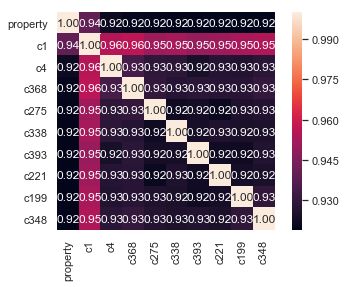

In [125]:
correlation_map = np.corrcoef(dfc[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

#### prepare data for the model

In [283]:
X = dfc.iloc[:,0:-1]
y = dfc.property.values

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Scale before PCA

In [285]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

#### Apply PCA and check how many components describe 90% of variance 

In [286]:
from sklearn.decomposition import PCA
pca = PCA(.90)
pca.fit(X_train_scaled)
print(pca.n_components_)

2


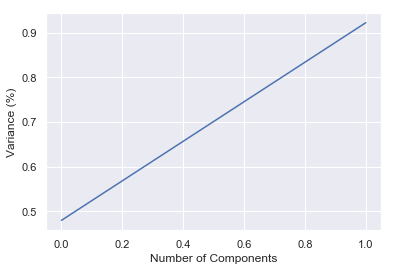

In [175]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.show()

In [171]:

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.47982014 0.442636  ]


In [153]:
np.cumsum(pca.explained_variance_ratio_)

array([0.47982014, 0.92245614])

In [287]:
train_pca = pca.transform(X_train_scaled)
test_pca = pca.transform(X_test_scaled)

#### Baseline

In [301]:
mean_squared_error(y_test, np.repeat(y_test.mean(), y_test.shape[0]))

10869.729574215331

#### Linear Regression

In [270]:
from sklearn.linear_model import LinearRegression

In [271]:
regr=LinearRegression()

In [272]:
from sklearn.metrics import mean_squared_error, r2_score

regr.fit(train_pca, y_train)
y_pred = regr.predict(test_pca)
print('Coefficients: \n', regr.coef_)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [-1.56214911  4.45205068]
Mean squared error: 116.05
Coefficient of determination: 0.99


#### Try with another scaler

In [177]:
from sklearn.preprocessing import MinMaxScaler

In [273]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0, 1])
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

pca3 = PCA(.90)
pca3.fit(X_train_sc)
print(pca3.n_components_)

2


In [274]:
print('Explained variation per principal component: {}'.format(pca3.explained_variance_ratio_))

Explained variation per principal component: [0.49340199 0.42849136]


In [275]:
train_pca3 = pca3.transform(X_train_sc)
test_pca3 = pca3.transform(X_test_sc)

In [276]:
regr.fit(train_pca3, y_train)
y_pred = regr.predict(test_pca3)
print('Coefficients: \n', regr.coef_)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [-23.77086636  16.40517178]
Mean squared error: 115.90
Coefficient of determination: 0.99


#### Try Ridge regression

In [277]:
from sklearn.linear_model import Ridge

In [ ]:
# without PCA

In [294]:
lr = LinearRegression()
lr.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print()
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.9984065208527199
linear regression test score: 0.9298113161280028

ridge regression train score low alpha: 0.9984065208527035
ridge regression test score low alpha: 0.9298113964993291
ridge regression train score high alpha: 0.9984057750196993
ridge regression test score high alpha: 0.9303351445373845


In [ ]:
# with PCA

In [288]:
lr = LinearRegression()
lr.fit(train_pca, y_train)
train_score=lr.score(train_pca, y_train)
test_score=lr.score(test_pca, y_test)

rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(train_pca, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(train_pca, y_train)
Ridge_train_score = rr.score(train_pca,y_train)
Ridge_test_score = rr.score(test_pca, y_test)
Ridge_train_score100 = rr100.score(train_pca,y_train)
Ridge_test_score100 = rr100.score(test_pca, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print()
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.9900457248029142
linear regression test score: 0.9893239201415117

ridge regression train score low alpha: 0.9900457248029139
ridge regression test score low alpha: 0.9893239198206631
ridge regression train score high alpha: 0.9900456905459103
ridge regression test score high alpha: 0.9893206786792891


In [73]:
from sklearn.model_selection import cross_val_score

In [76]:
#cv=cross_val_score(grid.best_estimator_, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
#np.mean(cv)

#### Try Decision Tree Regressor

In [289]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(train_pca, y_train)
y_pred = regr.predict(test_pca)


In [290]:
np.mean(cross_val_score(clf,train_pca, y_train, cv=10))

0.970233795628932

In [291]:
np.mean(cross_val_score(clf,test_pca, y_test, cv=10))

0.9437289667056931

In [207]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import RepeatedKFold, GridSearchCV

In [292]:
dt = tree.DecisionTreeRegressor()
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=10)


dt_gridserach = GridSearchCV(dt,
                                param_grid={
                                    'min_samples_split': [2,20,50,100,150,],
                                    'min_samples_leaf': [1,2,10,50]
                                    
                                           }, n_jobs=8,
                                return_train_score=True, scoring=mse_scorer, cv=rkf)
dt_gridserach.fit(train_pca, y_train)

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x000001C7126CFEB8>,
       error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid={'min_samples_split': [2, 20, 50, 100, 150], 'min_samples_leaf': [1, 2, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [293]:
print(dt_gridserach.best_params_)
print(dt_gridserach.best_score_)

{'min_samples_leaf': 2, 'min_samples_split': 2}
-261.1846222372476


In [298]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, train_pca, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -100.978937 (6.979684)
ScaledLASSO: -100.984418 (7.035636)
ScaledEN: -100.999091 (7.188977)
ScaledKNN: -171.864030 (16.199876)
ScaledCART: -288.909332 (41.814201)
ScaledGBM: -142.180914 (13.133368)
